# Income based on Age and Gender

## Summary:

The US Adult income dataset was downloaded from [Kaggle.com](https://www.kaggle.com/johnolafenwa/us-census-data). The actual data within the csv file was extracted by Barry Becker from the 1994 US Census Database. There are 32560 rows of data that relate income to social factors such as Age, Education, race, and gender. Income is represented as either earning greater than or less than 50,000 USD a year. Each row is labelled as either having a salary greater than ">50k" or "<=50k".

Note that according to the [Bureau of Labor and Statistics](https://www.bls.gov/data/inflation_calculator.htm) , 50k USD in Dec, 1994 would be equivalent to 83,912.16 USD in Dec, 2018.

Although there are many variables that can be reviewed with this dataset, I will focus only on Age and Gender. The primary goal of this notebook is to showcase skills learned within our Pre-Data Scientist program. Some of the questions that are reviewed will be:

#### Questions regarding Age:
- Per Age, what percentage of people earn greater than 50,000 USD per year?
- What is the mean and median age for those earning over and under 50,000 USD per year?

#### Diving deeper, questions regarding Gender: 
- By percentage and Age, what does the Male and Female workforce look like?
- Of those earning more than 50,000 USD per year, what percentage is Male? What percentage is Female?
- Of those earning less than 50,000 USD per year, what percentage is Male? What percentage is Female?

#### Future thoughts
- There are many more variables that need to be reviewed to see what and which variable has the greatest impact on income. Some of those variables that still need to be reviewed are: Eduation, Race, and Marital Status. 
- Although the T-test informs us that there is a signifcant difference, we cannot assume the populations listed below are the only factors related to income.
 - <=50k USD and >50k USD
 - Males and Females
 - Males and Females earning <=50k USD
 - Males and Females earning >50k USD

### Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Create a function to generate Statistics

In [0]:
def stats(y):
    print('Count of rows: ' + str(y.count()))
    print('Minimum: ' + str(y.min()))
    print('Maximum: ' + str(y.max()))
    print('Mean: ' + str(round(y.mean(),2)))
    print('Median: ' + str(y.median()))
    print('Standard Deviation: ' + str(round(y.std(),2)))
    print('Mode: ' + str(y.mode()[0]))

### Uploading CSV file, adding headers

In [104]:
# Import the csv file into a dataframe for analysis and manipulation

df = pd.read_csv('https://raw.githubusercontent.com/Vonganization/CSV_datasets/master/adult-training.csv', 
                 sep=",",
                 header=None,
                 names=['age','workclass','fnlwgt','education','education_num',
                        'marital_status',
                        'occupation',
                        'relationship',
                        'race',
                        'gender',
                        'capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'income_bracket'
                       ]
                )
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Create a DataFrame with only Age and Income as factors

In [105]:
age_and_income = df[['age','income_bracket']]

# Split the data so that we have two dataframes:
# Age with lesser than $50k
age_and_income_l50k = age_and_income[age_and_income['income_bracket']==' <=50K']
# Age with greater than $50k
age_and_income_g50k = age_and_income[age_and_income['income_bracket']==' >50K']

# Get the count of each age
# Rest_index used to add column headers
# Column headers will be used to help identify columns when plotting
age_g50k_group = age_and_income_g50k.groupby('age').agg('count').reset_index()
age_l50k_group = age_and_income_l50k.groupby('age').agg('count').reset_index()

# Renaming column headers
age_g50k_group.columns = ['age','g50k']
age_l50k_group.columns = ['age','l50k']

# Combining the columns of data back together for plotting purposes
# So there will be only one X-axis varible
age_combined = age_g50k_group.merge(age_l50k_group, left_on='age', right_on='age')

age_combined.head()



,age,g50k,l50k
0,19,2,710
1,21,3,717
2,22,13,752
3,23,12,865
4,24,31,767


### Generate a Bar Plot that visually shows the distribution of data by Age
As we can see, the number of individuals who earn >50k USD increases by age, and begins to decline around the median age of 44.

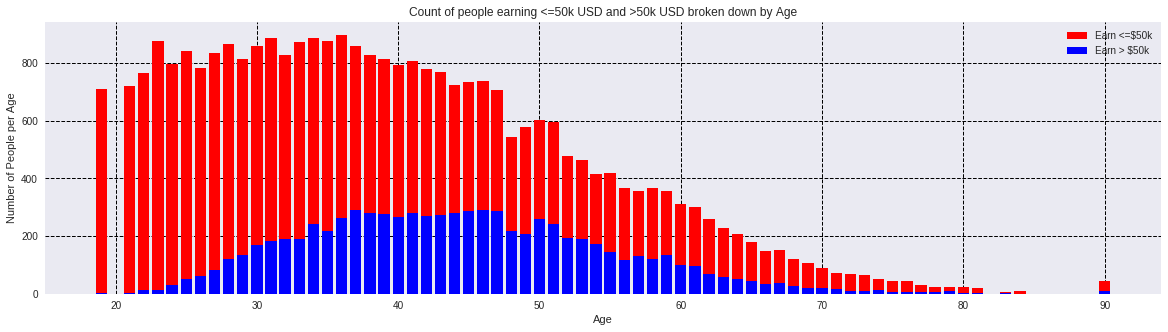

In [106]:
# X-axis value
x1 = age_combined['age']

# Y-axis values
y1 = age_combined['l50k']
y2 = age_combined['g50k']

# So the bars will appear stacked on top of each other
y3 = y1 + y2

# looking at percent instead...
y1_p = y1 / y3 * 100
y2_p = y2 / y3 * 100
y3_p = y1_p + y2_p

# Labels for legend
l_l50k = 'Earn <=$50k'
l_g50k = 'Earn > $50k'

# Bar of actual Count
plt.figure(figsize=(20,5))
plt.bar(x1, y3, color='Red', label=l_l50k)
plt.bar(x1, y2, color='Blue', label=l_g50k)
plt.ylabel('Number of People per Age')
plt.xlabel('Age')
plt.title('Count of people earning <=50k USD and >50k USD broken down by Age')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(loc="upper right")
plt.show()

### Based on Age, T-test and statistics for people who earn >50k USD and <=50k USD

Comparing two populations using a T-test: those who earn <=50k USD, and those who earn >50k USD. T-test shows there is a significant difference between the two populations and 0 chance of the difference due to randomness.

In [107]:
# Statistics on population by Age for those who earn <= 50,000 USD
print('Statistics on population by Age for those who earn less than or equal to 50,000 USD')
stats(age_and_income_l50k['age'])
print('')
# Statistics on population by Age for those who earn more than 50,000 USD
print('Statistics on population by Age for those who earn more than 50,000 USD')
stats(age_and_income_g50k['age'])
print('')

# T-test comparing only <=50k USD and >50k USD
print('T-test comparing only <=50k USD and >50k USD')
print(ttest_ind(age_and_income_l50k['age'],age_and_income_g50k['age']))

Statistics on population by Age for those who earn less than or equal to 50,000 USD
Count of rows: 24720
Minimum: 17
Maximum: 90
Mean: 36.78
Median: 34.0
Standard Deviation: 14.02
Mode: 23

Statistics on population by Age for those who earn more than 50,000 USD
Count of rows: 7841
Minimum: 19
Maximum: 90
Mean: 44.25
Median: 44.0
Standard Deviation: 10.52
Mode: 37

T-test comparing only <=50k USD and >50k USD
Ttest_indResult(statistic=-43.436244240451096, pvalue=0.0)


### Taking a look at what percentage of people earn <=50k USD and >50k USD by Age

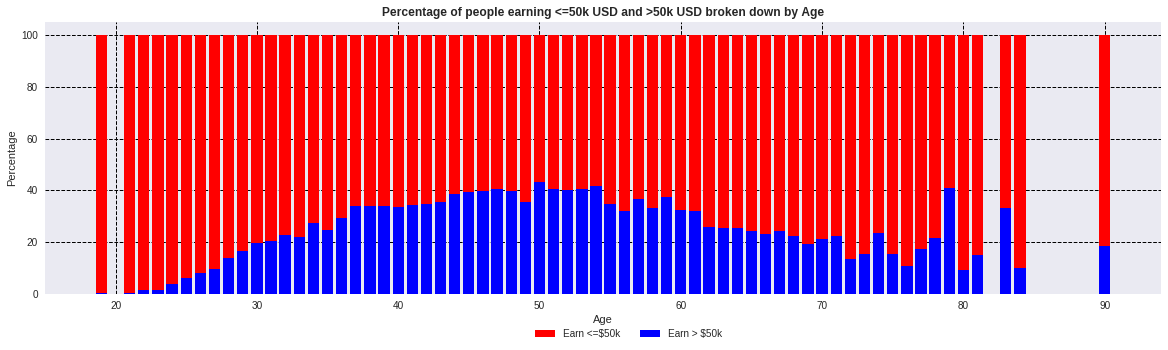

In [108]:
# Bar of percent people 
plt.figure(figsize=(20,5))
plt.bar(x1, y3_p, color='Red', label=l_l50k)
plt.bar(x1, y2_p, color='Blue', label=l_g50k)
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Percentage of people earning <=50k USD and >50k USD broken down by Age', fontweight='bold')
plt.legend(bbox_to_anchor=(.615,-0.095), ncol=2)
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.show()

### Listed by percent in a dataframe, the Top 10 Ages for those earning <=50k USD and >50k USD.

In [109]:
# Shows by percent, Top 10 Ages earning greater than 50,000 USD
print('By percent, Top 10 Ages earning greater than 50,000 USD')
age_combined['Percent_g50k'] = round(y2 / y3 * 100, 2)
age_combined[['age','Percent_g50k']].nlargest(10, 'Percent_g50k')

By percent, Top 10 Ages earning greater than 50,000 USD


,age,Percent_g50k
30,50,43.36
34,54,41.69
59,79,40.91
33,53,40.73
27,47,40.68
31,51,40.67
32,52,40.17
28,48,39.96
26,46,39.62
25,45,39.24


In [110]:
# Shows by percent, Top 10 Ages earning less than or equal to 50,000 USD
print('By percent, Top 10 Ages earning less than or equal to 50,000 USD')
age_combined['Percent_l50k'] = round(y1 / y3 * 100, 2)
age_combined[['age','Percent_l50k']].nlargest(10, 'Percent_l50k')

By percent, Top 10 Ages earning less than or equal to 50,000 USD


,age,Percent_l50k
0,19,99.72
1,21,99.58
3,23,98.63
2,22,98.30
4,24,96.12
5,25,93.70
6,26,91.97
60,80,90.91
7,27,90.30
63,84,90.00


### Now to take a look at Gender and Age.

### We first create a Gender and Age dataframe

In [111]:
# Create a Dataframe with Age and Gender only
age_gender = df[['age','gender']]

# Breakup DataFrame into male and female to get count
age_male_only = age_gender[age_gender['gender']==' Male'].groupby('age').agg('count').reset_index()
age_female_only = age_gender[age_gender['gender']==' Female'].groupby('age').agg('count').reset_index()

age_male_only.columns = ['age','male']
age_female_only.columns = ['age', 'female']

# Merge the data to share age column 
age_gender_merged = age_male_only.merge(age_female_only, left_on='age',right_on='age')

# Add percent male and percent female to dataframe
age_gender_total = age_gender_merged['male'] + age_gender_merged['female']

# Create dataframe containing same age value column, with percentage breakdown for Male or Female
age_gender_merged['percent_male'] = round(age_gender_merged['male'] / age_gender_total * 100, 2)
age_gender_merged['percent_female'] = round(age_gender_merged['female'] / age_gender_total * 100, 2)
age_gender_merged['total_percent'] = age_gender_merged['percent_male'] + age_gender_merged['percent_female']

age_gender_merged.head()

,age,male,female,percent_male,percent_female,total_percent
0,17,209,186,52.91,47.09,100.0
1,18,282,268,51.27,48.73,100.0
2,19,356,356,50.00,50.00,100.0
3,20,390,363,51.79,48.21,100.0
4,21,391,329,54.31,45.69,100.0


### Statistics and T-test regarding Gender and Age

T-test shows there is a significant difference between the number of Male and Female workforce with a p-value >0.01.

In [112]:
# Stats for Male workforce by Age
print('Stats for Male workforce by Age')
age_male_stats = age_gender[age_gender['gender']==' Male']
stats(age_male_stats['age'])

print('')

# Stats for Female workforce by Age
print('Stats for Female workforce by Age')
age_female_stats = age_gender[age_gender['gender']==' Female']
stats(age_female_stats['age'])

print('')
# T-test comparing Male and Female populations
print('T-test comparing Male and Female populations')
print(ttest_ind(age_male_stats['age'], age_female_stats['age']))

Stats for Male workforce by Age
Count of rows: 21790
Minimum: 17
Maximum: 90
Mean: 39.43
Median: 38.0
Standard Deviation: 13.37
Mode: 35

Stats for Female workforce by Age
Count of rows: 10771
Minimum: 17
Maximum: 90
Mean: 36.86
Median: 35.0
Standard Deviation: 14.01
Mode: 20

T-test comparing Male and Female populations
Ttest_indResult(statistic=16.092517011911756, pvalue=4.8239930687799265e-58)


### By Age and percentage represeneted by a plot chart, Males and Females in the workforce

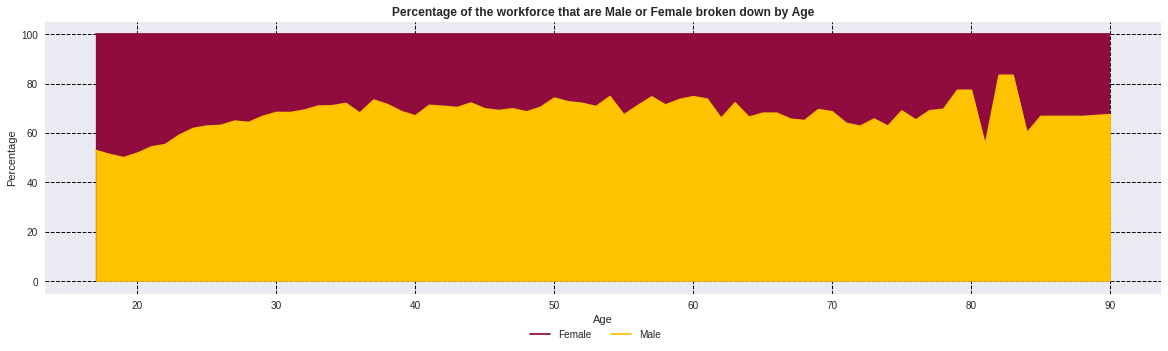

In [113]:
# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_merged['age'],age_gender_merged['total_percent'], color='#900C3F', label='Female')
plt.plot(age_gender_merged['age'],age_gender_merged['percent_male'], color='#FFC300', label='Male')
plt.fill_between(age_gender_merged['age'], age_gender_merged['total_percent'], 0, color='#900C3F')
plt.fill_between(age_gender_merged['age'], age_gender_merged['percent_male'], 0, color='#FFC300')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

### Top 10 Ages where Females and Males are the majority

In [114]:
# Shows by percent, Top 10 Ages where the majority are Male
print('By percent, Top 10 Ages where the majority are Male')
age_gender_merged[['age','percent_male']].nlargest(10, 'percent_male')

By percent, Top 10 Ages where the majority are Male


,age,percent_male
65,82,83.33
66,83,83.33
62,79,77.27
63,80,77.27
37,54,74.70
43,60,74.68
40,57,74.58
33,50,74.09
44,61,73.67
42,59,73.52


In [115]:
# Shows by percent, Top 10 Ages where the majority are Female
print('By percent, Top 10 Ages where the majority are Female')
age_gender_merged[['age','percent_female']].nlargest(10, 'percent_female')

By percent, Top 10 Ages where the majority are Female


,age,percent_female
2,19,50.00
1,18,48.73
3,20,48.21
0,17,47.09
4,21,45.69
64,81,45.00
5,22,44.71
6,23,40.94
67,84,40.00
7,24,38.22


### Now we begin to look at three variables: Age, Gender, Income

There are two dataframes created:
- One for those who earn <=50k USD
- Second one for those who earn >50k USD

### We begin with those who earn <=50k USD first

In [116]:
# Now need to create two separate dataframes:
# One for those who earn <=50k USD
# Second for those who earn >50k USD

# Create a DataFrame with Age, Gender, Income
age_gender_income = df[['age','gender','income_bracket']]

# Split the data so that we have two dataframes:
# Age with lesser than $50k
age_gender_income_l50k = age_gender_income[age_gender_income['income_bracket']==' <=50K']

# Now, for those earning <=50k, what percentage is male, and what percentage is female
age_gender_income_l50k_male = age_gender_income_l50k[age_gender_income_l50k['gender']==' Male'].groupby('age').agg('count').reset_index()
age_gender_income_l50k_female = age_gender_income_l50k[age_gender_income_l50k['gender']==' Female'].groupby('age').agg('count').reset_index()

# Rename columns so I can merge dataframes
age_gender_income_l50k_male.columns = ['age','male_count','income_bracket_count']
age_gender_income_l50k_female.columns = ['age','female_count','income_bracket_count']

# Merge
age_gender_income_l50k_merge = age_gender_income_l50k_male[['age','male_count']].merge(age_gender_income_l50k_female[['age','female_count']], left_on='age', right_on='age')

# Add percentages to dataframe
age_gender_income_150k_merge_t = age_gender_income_l50k_merge['male_count'] + age_gender_income_l50k_merge['female_count']
age_gender_income_l50k_merge['p_male'] = round(age_gender_income_l50k_merge['male_count'] / age_gender_income_150k_merge_t * 100, 2)
age_gender_income_l50k_merge['p_female'] = round(age_gender_income_l50k_merge['female_count'] / age_gender_income_150k_merge_t * 100, 2)

age_gender_income_l50k_merge.head()

,age,male_count,female_count,p_male,p_female
0,17,209,186,52.91,47.09
1,18,282,268,51.27,48.73
2,19,355,355,50.00,50.00
3,20,390,363,51.79,48.21
4,21,390,327,54.39,45.61


### Generate Statistics for Female and Males who earn <=50k USD

In [117]:
# For people who earn <=50k USD, stats for Male workforce by Age
print('For people who earn <=50k USD, stats for Male workforce by Age')
age_male_l50k_stats = age_gender_income_l50k[age_gender_income_l50k['gender']==' Male']
stats(age_male_l50k_stats['age'])

For people who earn <=50k USD, stats for Male workforce by Age
Count of rows: 15128
Minimum: 17
Maximum: 90
Mean: 37.15
Median: 35.0
Standard Deviation: 13.86
Mode: 23


In [118]:
# For people who earn <=50k USD, stats for Female workforce by Age
print('For people who earn <=50k USD, stats for Female workforce by Age')
age_female_l50k_stats = age_gender_income_l50k[age_gender_income_l50k['gender']==' Female']
stats(age_female_l50k_stats['age'])

For people who earn <=50k USD, stats for Female workforce by Age
Count of rows: 9592
Minimum: 17
Maximum: 90
Mean: 36.21
Median: 34.0
Standard Deviation: 14.26
Mode: 20


### T-test for those earning <=50k USD, comparing Males and Females by Age
T-test shows there's a significant difference and the p-value is <0.01

In [119]:
# T-test for those earning <=50k USD, comparing Males and Females by Age
print('T-test for those earning <=50k USD, comparing Males and Females by Age')
print(ttest_ind(age_male_l50k_stats['age'], age_female_l50k_stats['age']))

T-test for those earning <=50k USD, comparing Males and Females by Age
Ttest_indResult(statistic=5.118769813761817, pvalue=3.098380651743999e-07)


### A plot for those earning <=50k USD of the percentage of Males and Females by Age

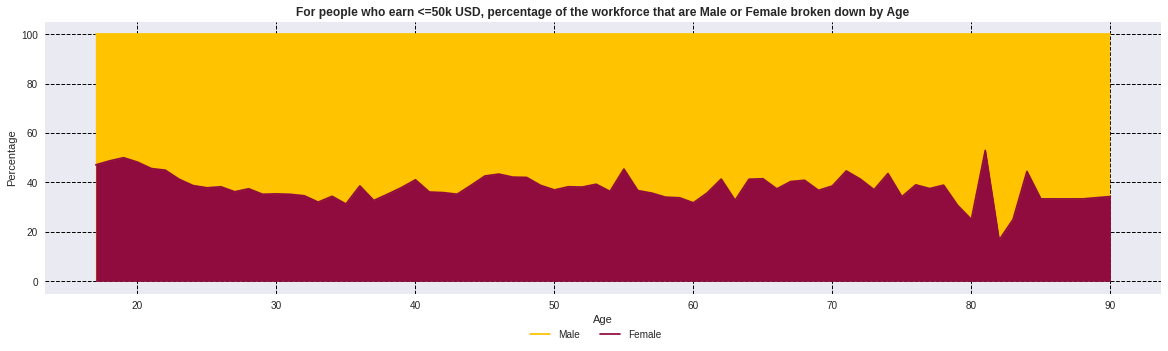

In [120]:
# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_income_l50k_merge['age'],age_gender_income_l50k_merge['p_male'] + age_gender_income_l50k_merge['p_female'], color='#FFC300', label='Male')
plt.plot(age_gender_income_l50k_merge['age'],age_gender_income_l50k_merge['p_female'], color='#900C3F', label='Female')
plt.fill_between(age_gender_income_l50k_merge['age'], age_gender_income_l50k_merge['p_male'] + age_gender_income_l50k_merge['p_female'], 0, color='#FFC300')
plt.fill_between(age_gender_income_l50k_merge['age'], age_gender_income_l50k_merge['p_female'], 0, color='#900C3F')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('For people who earn <=50k USD, percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

### For those earning <=50k USD, Top 10 Ages where Females and Males are the majority

In [121]:
# For people who earn <=50k USD, shows by percent, Top 10 Ages for Male workers
print('For people who earn <=50k USD, by percent, Top 10 Ages where Males are the majority')
age_gender_income_l50k_merge[['age','p_male']].nlargest(10, 'p_male')

For people who earn <=50k USD, by percent, Top 10 Ages where Males are the majority


,age,p_male
65,82,83.33
63,80,75.00
66,83,75.00
62,79,69.23
18,35,68.74
43,60,68.25
16,33,67.98
20,37,67.31
46,63,67.25
68,85,66.67


In [122]:
# For people who earn <=50k USD, shows by percent, Top 10 Ages for Female workers
print('For people who earn <=50k USD, by percent, Top 10 Ages where Females are the majority')
age_gender_income_l50k_merge[['age','p_female']].nlargest(10, 'p_female')

For people who earn <=50k USD, by percent, Top 10 Ages where Females are the majority


,age,p_female
64,81,52.94
2,19,50.00
1,18,48.73
3,20,48.21
0,17,47.09
4,21,45.61
38,55,45.42
5,22,44.95
54,71,44.64
67,84,44.44


### Now generate a dataframe for those who earn >50k USD with variables: Age, Gender, Income

In [123]:
# Second for those who earn >50k USD

# Age with greater than $50k
age_gender_income_g50k = age_gender_income[age_gender_income['income_bracket']==' >50K']

# Now, for those earning >50k, what percentage is male, and what percentage is female
age_gender_income_g50k_male = age_gender_income_g50k[age_gender_income_g50k['gender']==' Male'].groupby('age').agg('count').reset_index()
age_gender_income_g50k_female = age_gender_income_g50k[age_gender_income_g50k['gender']==' Female'].groupby('age').agg('count').reset_index()

# Rename columns so I can merge dataframes
age_gender_income_g50k_male.columns = ['age','male_count','income_bracket_count']
age_gender_income_g50k_female.columns = ['age','female_count','income_bracket_count']

# Merge
age_gender_income_g50k_merge = age_gender_income_g50k_male[['age','male_count']].merge(age_gender_income_g50k_female[['age','female_count']], left_on='age', right_on='age')

# Add percentages to dataframe
age_gender_income_g50k_merge_t = age_gender_income_g50k_merge['male_count'] + age_gender_income_g50k_merge['female_count']
age_gender_income_g50k_merge['p_male'] = round(age_gender_income_g50k_merge['male_count'] / age_gender_income_g50k_merge_t * 100, 2)
age_gender_income_g50k_merge['p_female'] = round(age_gender_income_g50k_merge['female_count'] / age_gender_income_g50k_merge_t * 100, 2)

age_gender_income_g50k_merge.head()

,age,male_count,female_count,p_male,p_female
0,19,1,1,50.00,50.00
1,21,1,2,33.33,66.67
2,22,9,4,69.23,30.77
3,23,10,2,83.33,16.67
4,24,23,8,74.19,25.81


### Generate Statistics for Female and Males who earn >50k USD

In [124]:
# For people who earn >50k USD, stats for Male workforce by Age
print('For people who earn >50k USD, stats for Male workforce by Age')
age_male_g50k_stats = age_gender_income_g50k[age_gender_income_g50k['gender']==' Male']
stats(age_male_g50k_stats['age'])

For people who earn >50k USD, stats for Male workforce by Age
Count of rows: 6662
Minimum: 19
Maximum: 90
Mean: 44.63
Median: 44.0
Standard Deviation: 10.49
Mode: 46


In [125]:
# For people who earn >50k USD, stats for Female workforce by Age
print('For people who earn >50k USD, stats for Females workforce by Age')
age_female_g50k_stats = age_gender_income_g50k[age_gender_income_g50k['gender']==' Female']
stats(age_female_g50k_stats['age'])

For people who earn >50k USD, stats for Females workforce by Age
Count of rows: 1179
Minimum: 19
Maximum: 90
Mean: 42.13
Median: 41.0
Standard Deviation: 10.46
Mode: 43


### T-test for those earning >50k USD, comparing Males and Females by Age
T-test shows there's a significant difference and the p-value is <0.01

In [126]:
# T-test for those earning >50k USD, comparing Males and Females by Age
print('T-test for those earning >50k USD, comparing Males and Females by Age')
print(ttest_ind(age_male_g50k_stats['age'], age_female_g50k_stats['age']))

T-test for those earning >50k USD, comparing Males and Females by Age
Ttest_indResult(statistic=7.549673624514367, pvalue=4.8548482832255065e-14)


### A plot for those earning >50k USD of the percentage of Males and Females by Age

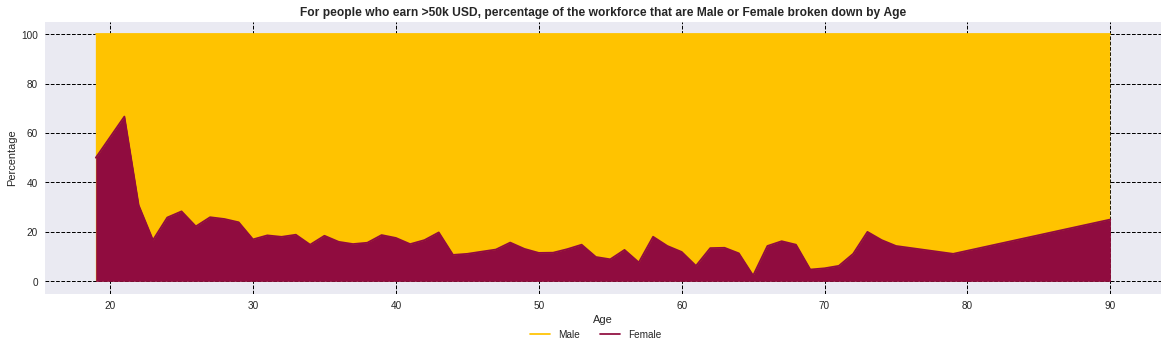

In [127]:
# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_income_g50k_merge['age'],age_gender_income_g50k_merge['p_male'] + age_gender_income_g50k_merge['p_female'], color='#FFC300', label='Male')
plt.plot(age_gender_income_g50k_merge['age'],age_gender_income_g50k_merge['p_female'], color='#900C3F', label='Female')
plt.fill_between(age_gender_income_g50k_merge['age'], age_gender_income_g50k_merge['p_male'] + age_gender_income_g50k_merge['p_female'], 0, color='#FFC300')
plt.fill_between(age_gender_income_g50k_merge['age'], age_gender_income_g50k_merge['p_female'], 0, color='#900C3F')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('For people who earn >50k USD, percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

### For those earning >50k USD, Top 10 Ages where Females and Males are the majority

In [128]:
# For people who earn >50k USD, shows by percent, Top 10 Ages for Male workers
print('For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Male workers')
age_gender_income_g50k_merge[['age','p_male']].nlargest(10, 'p_male')

For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Male workers


,age,p_male
45,65,97.67
49,69,95.24
50,70,94.74
41,61,93.75
51,71,93.75
37,57,92.37
35,55,91.10
34,54,90.17
24,44,89.32
25,45,88.89


In [129]:
# For people who earn >50k USD, shows by percent, Top 10 Ages for Female workers
print('For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Female workers')
age_gender_income_g50k_merge[['age','p_female']].nlargest(10, 'p_female')

For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Female workers


,age,p_female
1,21,66.67
0,19,50.00
2,22,30.77
5,25,28.30
7,27,25.93
4,24,25.81
8,28,25.21
57,90,25.00
9,29,23.88
6,26,22.22


# Final Comments:

As stated in the summary, more work needs to be done to determine how much weight Age and Gender have on income in comparison to Education, Race, Workhours, etc.